In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [59]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [60]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


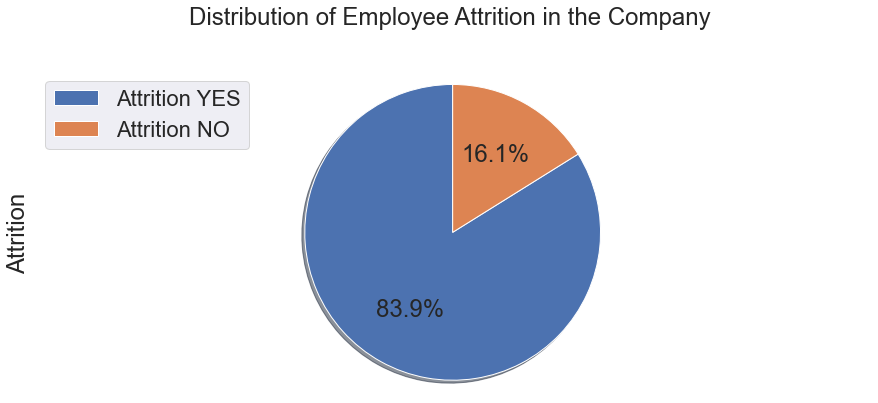

In [61]:
labels = 'Attrition YES','Attrition NO'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

In [62]:
df.shape

(1470, 35)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [64]:
#Check for missing values in the data
df.isnull().values.any()

False

There are no missing values

In [65]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [66]:
# Exploring Categorical Columns
df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [67]:
# Exploring unique values in the categorical columns
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("---------------------------------------------------------------------")

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
---------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------------------------------------------------------------------

We notice that 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. These features are not useful for us, those columns can be dropped.

In [68]:
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

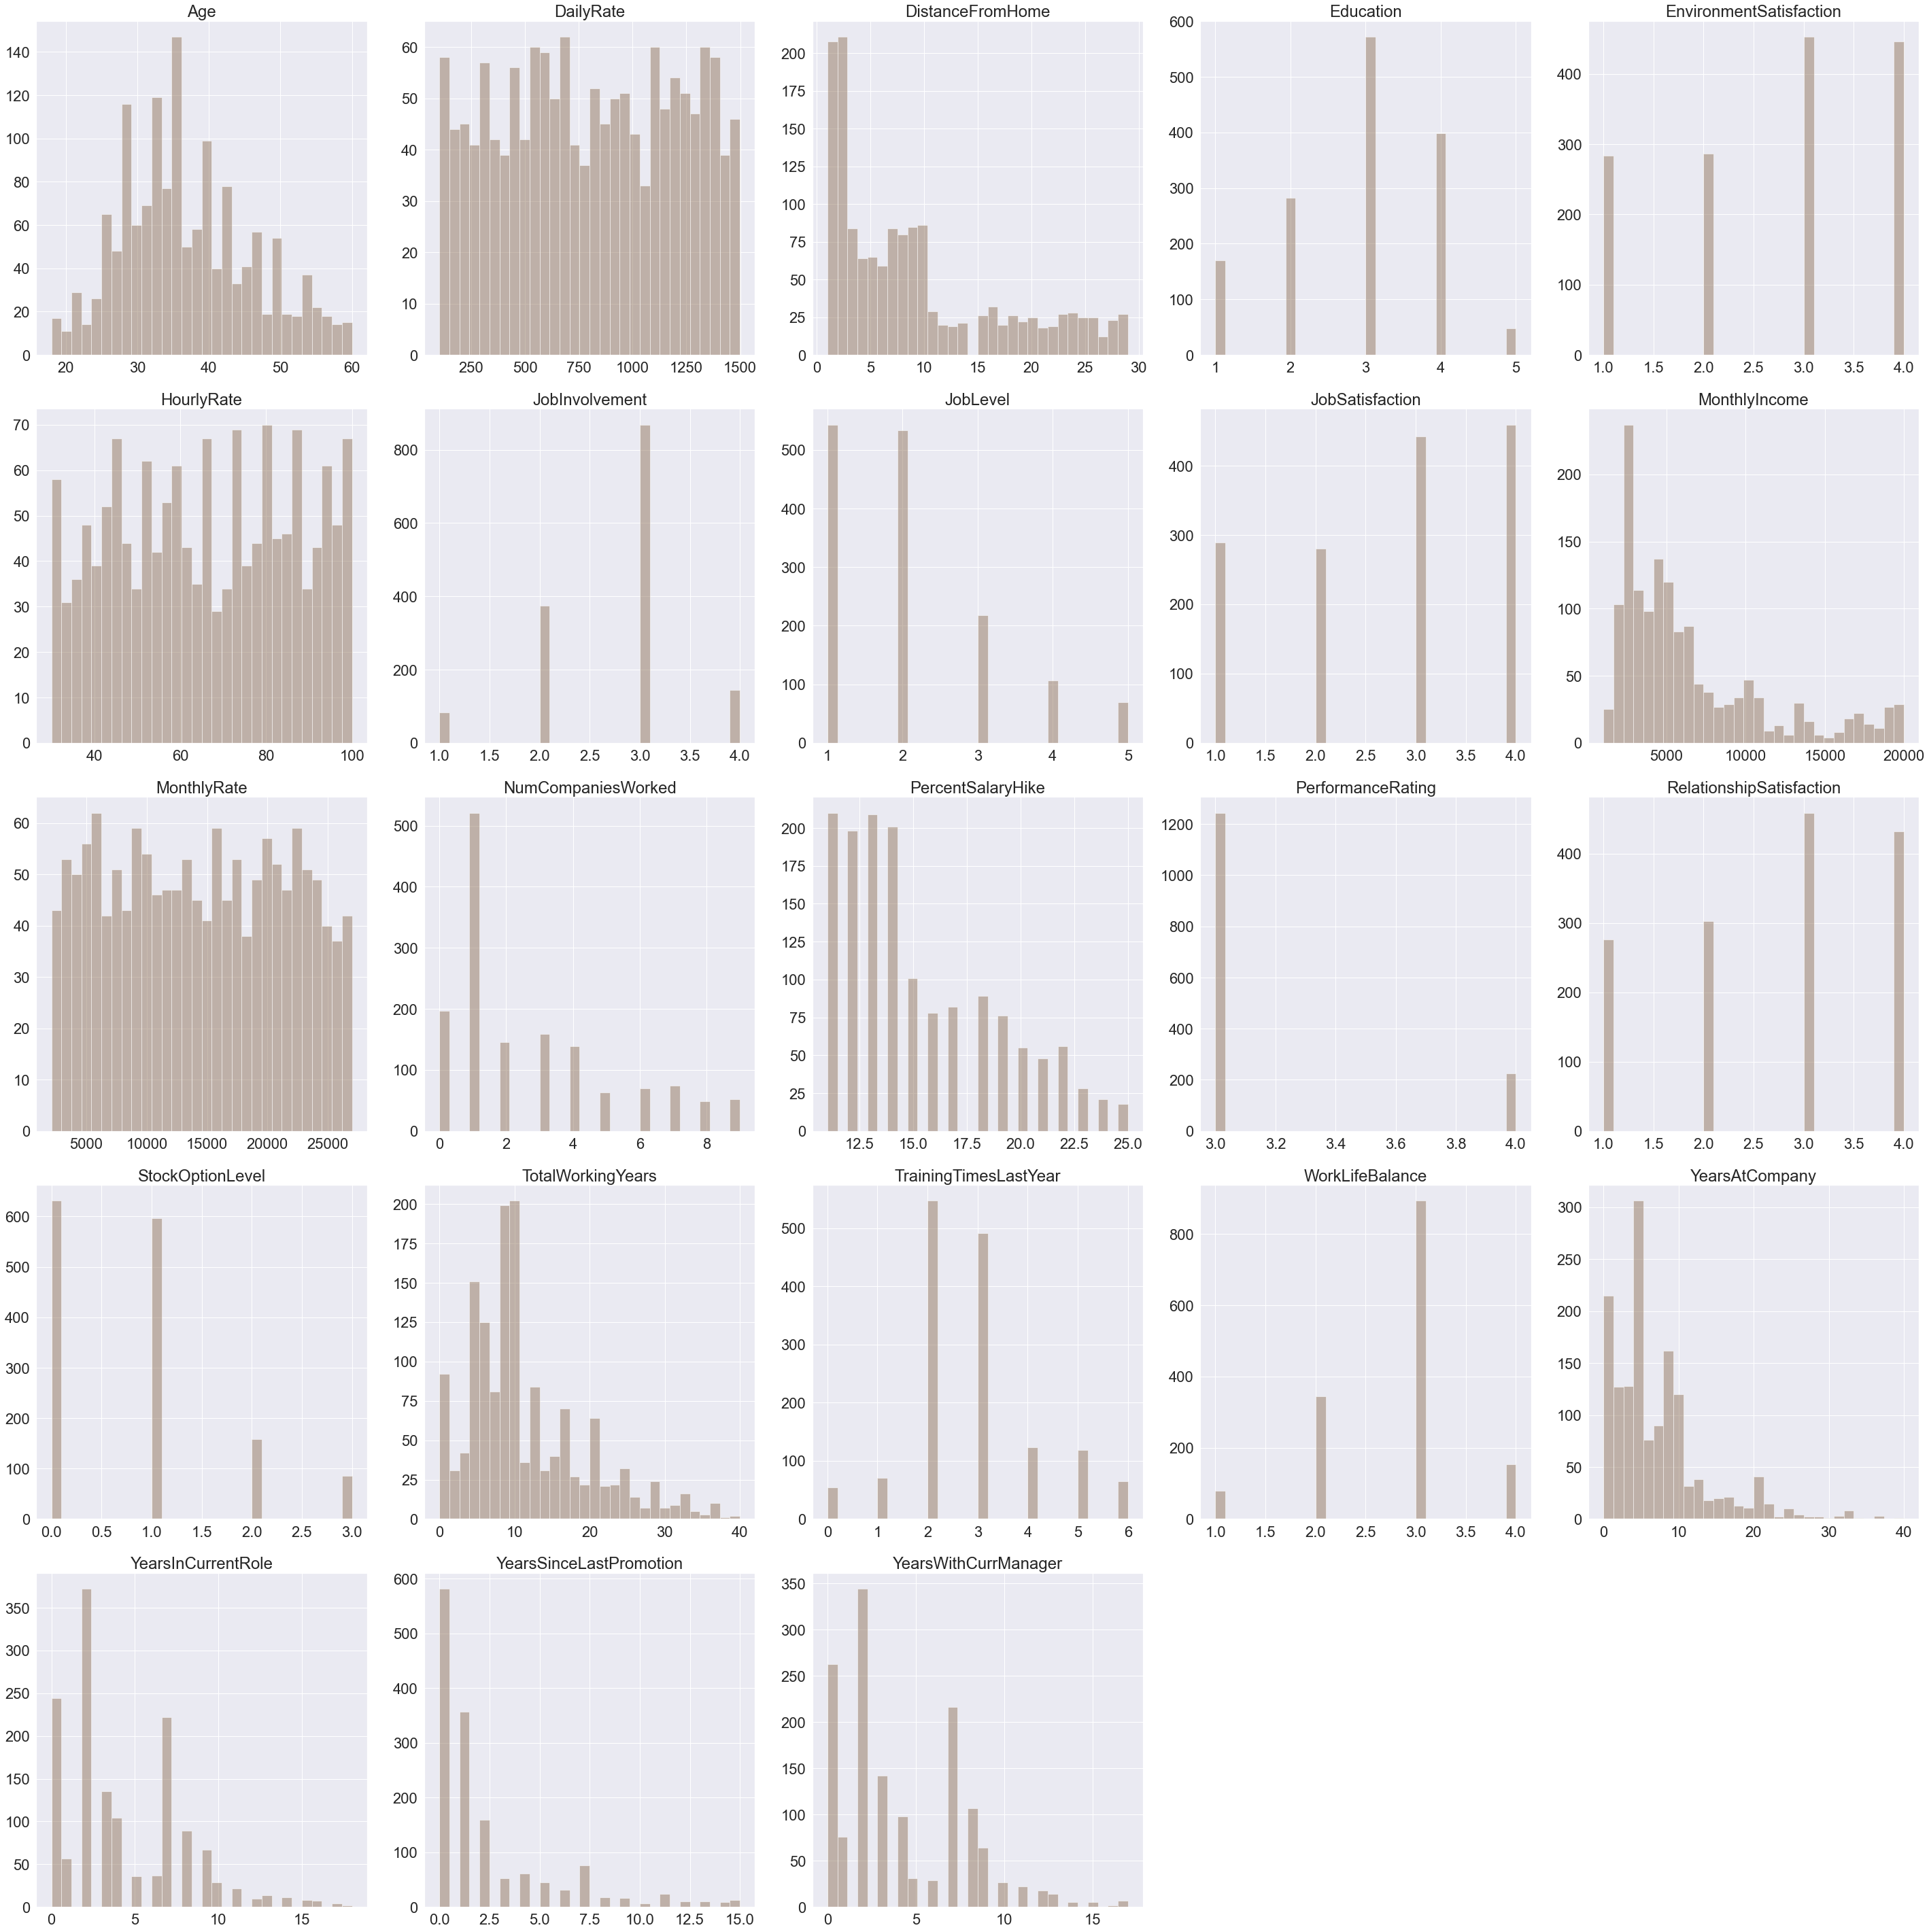

In [69]:
my_palette = sns.color_palette('deep')
sns.set(font_scale=2)
df.hist(bins=30, figsize=(40,40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()

Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, JobLevel,YearsAtCompany).

'Education','EnvironmentSatisfaction','JobInvolvement', 'JobRole', 'JobSatisfaction', 'RelationshipSatisfaction' are left-slewed which suggest that most of the empolyees are well educated and satisfied with their job role and work environment.

Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

'MonthlyIncome', 'JobLevel', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' are positivley-skewed distribution wich suggest that most of the compensation related attributes values are relatively close to the lower bound.

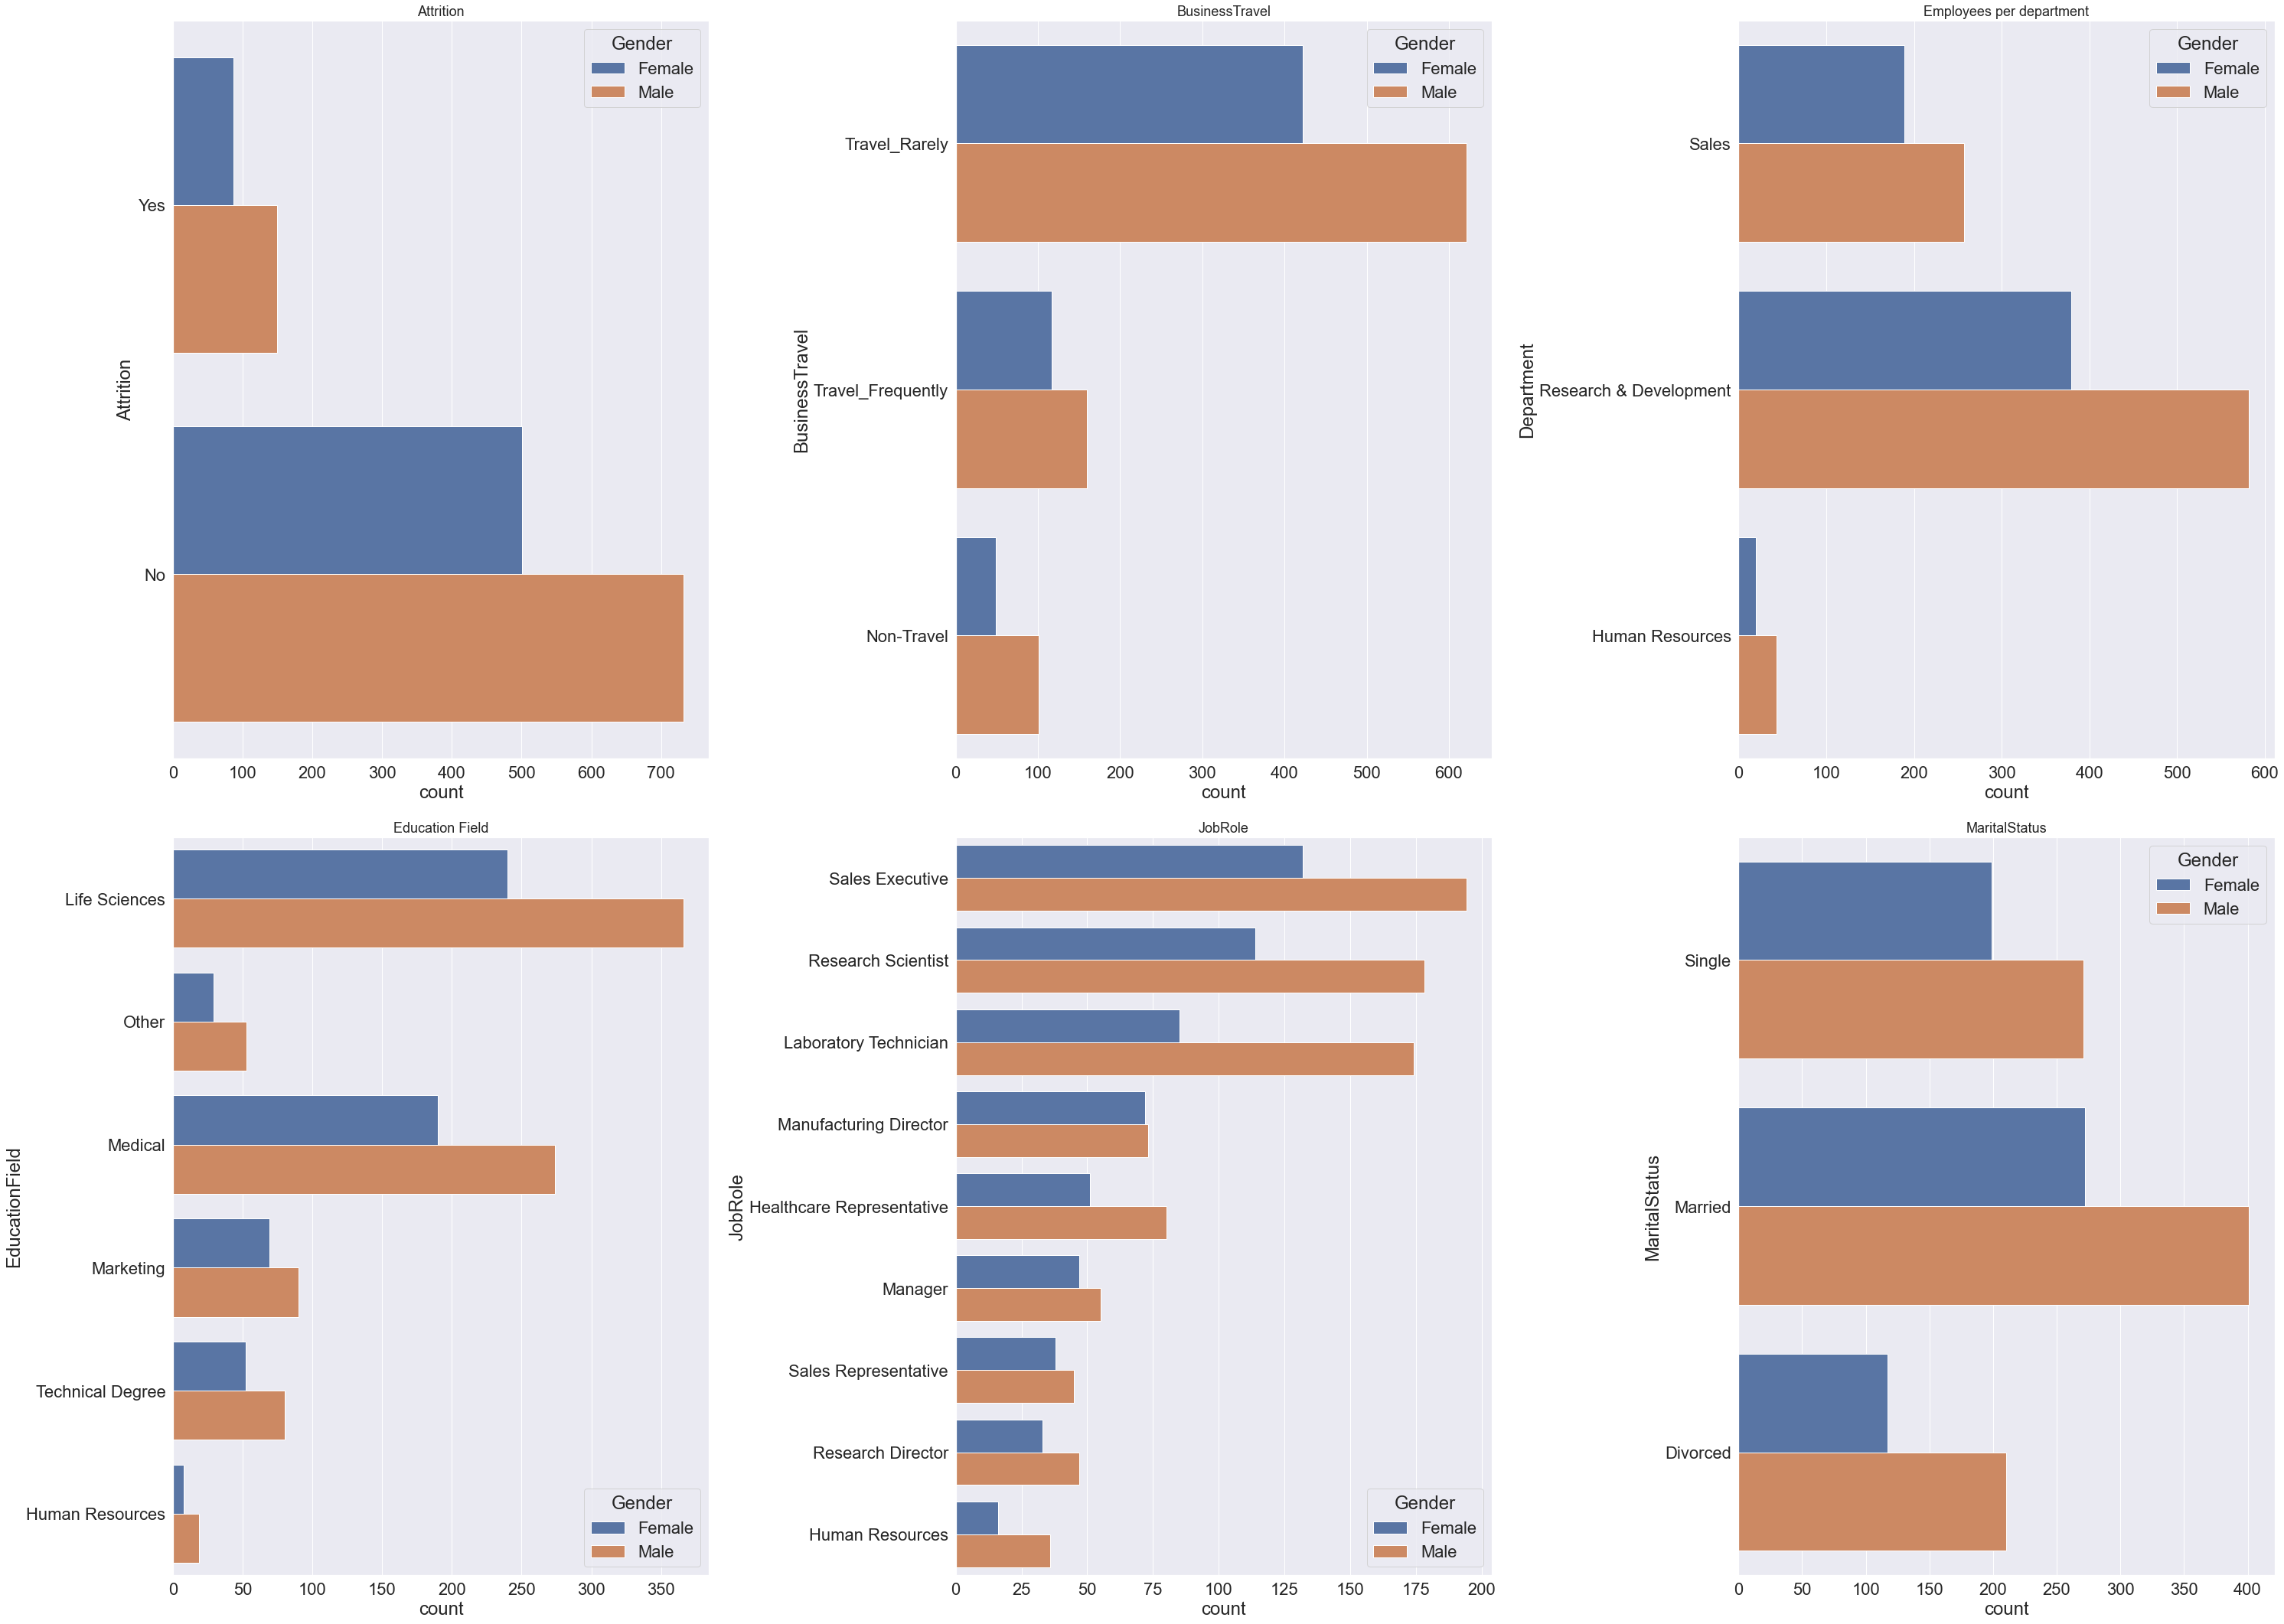

In [70]:
# Exploration of Categorical columns
fig = plt.figure(figsize=(42,30))
plt.subplot(2,3,1)
plt.title('Attrition', fontsize=18)
sns.countplot(data = df, y = 'Attrition', hue= "Gender", palette='deep', orient="h")

plt.subplot(2,3,2)
plt.title('BusinessTravel', fontsize=18)
sns.countplot(data = df, y = 'BusinessTravel', hue= 'Gender', palette='deep', orient="h")

plt.subplot(2,3,3)
plt.title('Employees per department', fontsize=18)
sns.countplot(data = df, y = 'Department', hue = 'Gender', palette='deep', orient="h")

plt.subplot(2,3,4)
plt.title('Education Field', fontsize=18)
sns.countplot(data = df, y = 'EducationField', hue = 'Gender', palette='deep', orient="h")

plt.subplot(2,3,5)
plt.title('JobRole', fontsize=18)
sns.countplot(data = df, y = 'JobRole', hue = 'Gender', palette='deep', orient="h")

plt.subplot(2,3,6)
plt.title('MaritalStatus', fontsize=18)
sns.countplot(data = df, y = 'MaritalStatus', hue = 'Gender', palette='deep', orient="h")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

We can see Gender-wise countplot data for all the categorical columns.

We can get Idea various categorical sub-values and their frequency with reference to Gender of employees.

Attrition rate is greater in Male than Female employees.

We can also see that males are leading in every countplot which suggest that female employees are struggling or lagging behind somewhat in the corporate world.

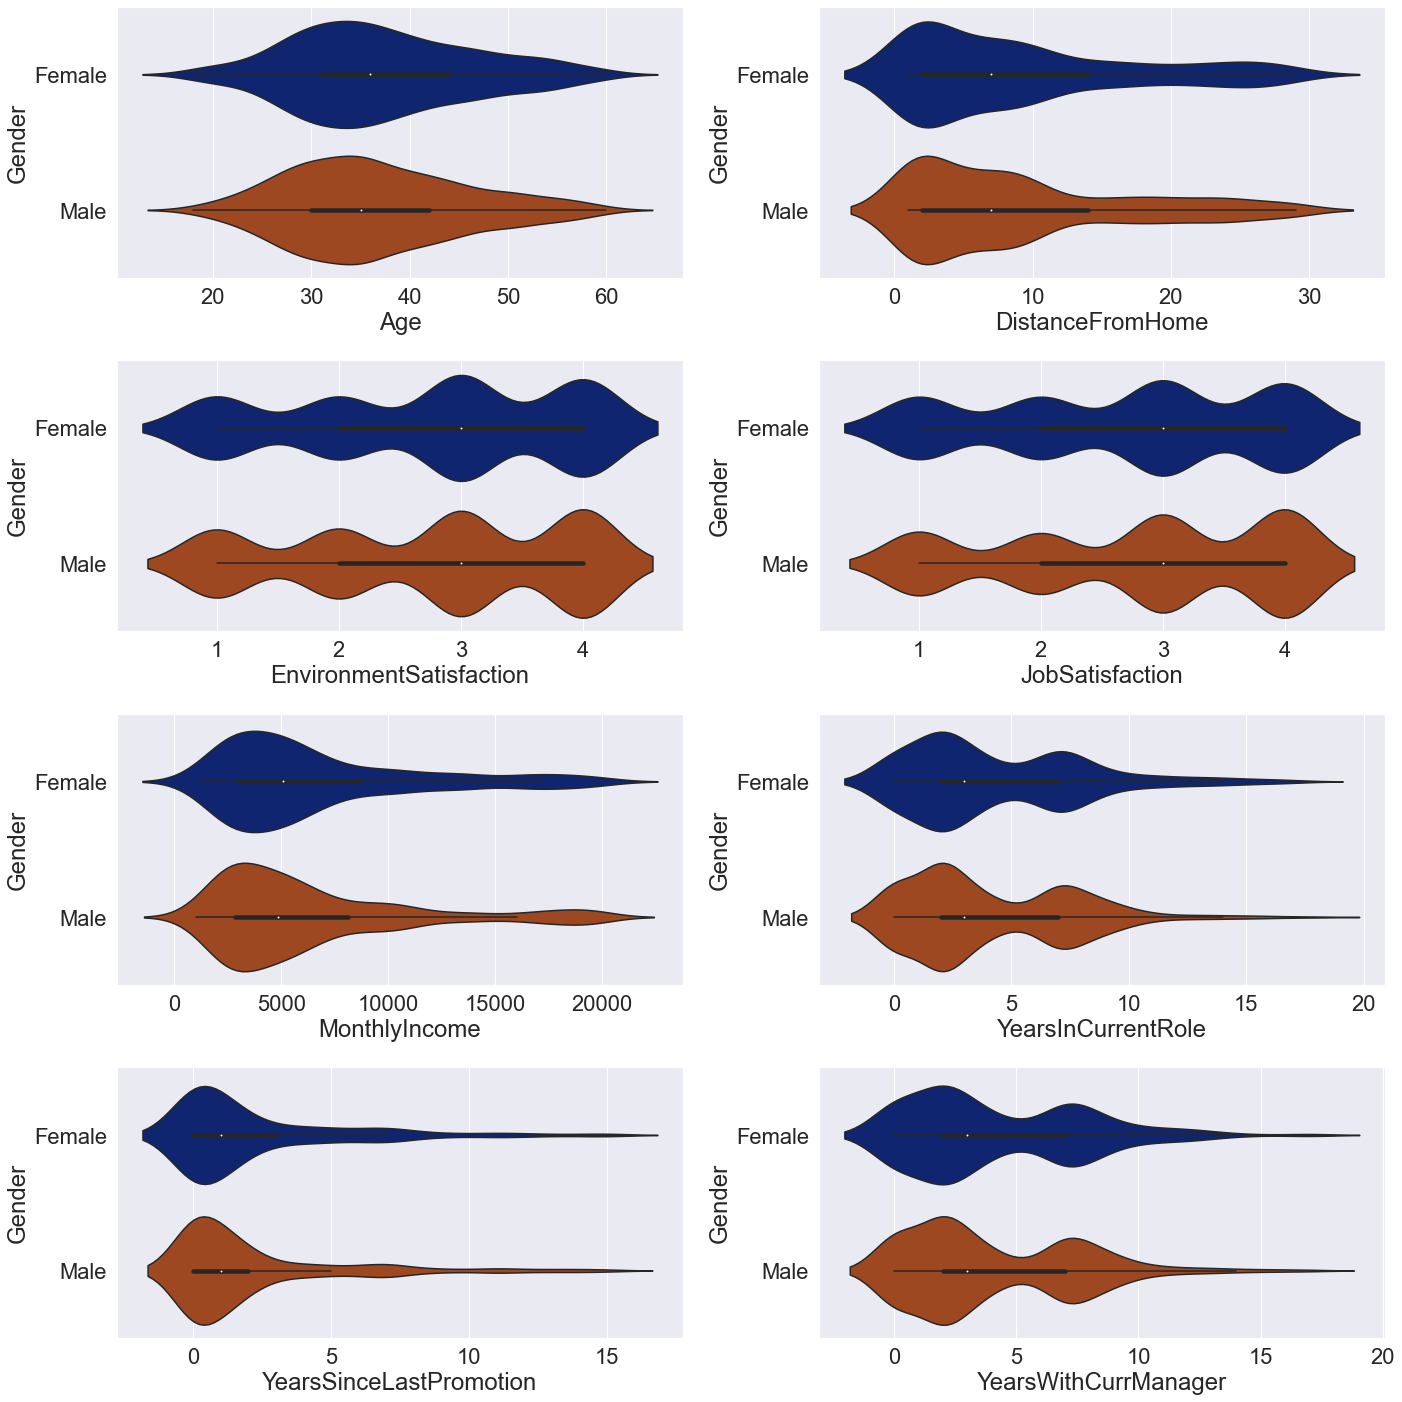

In [71]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

sns.violinplot(ax=axes[0, 0], data=df, x='Age', y='Gender', palette='dark')
sns.violinplot(ax=axes[0, 1], data=df, x='DistanceFromHome', y='Gender', palette='dark')
sns.violinplot(ax=axes[1, 0], data=df, x='EnvironmentSatisfaction', y='Gender', palette='dark')
sns.violinplot(ax=axes[1, 1], data=df, x='JobSatisfaction', y='Gender', palette='dark')
sns.violinplot(ax=axes[2, 0], data=df, x='MonthlyIncome', y='Gender', palette='dark')
sns.violinplot(ax=axes[2, 1], data=df, x='YearsInCurrentRole', y='Gender', palette='dark')
sns.violinplot(ax=axes[3, 0], data=df, x='YearsSinceLastPromotion', y='Gender', palette='dark')
sns.violinplot(ax=axes[3, 1], data=df, x='YearsWithCurrManager', y='Gender', palette='dark')

plt.tight_layout()
plt.show()

For all attributes for both Genders distribution is mostly even.

Avg Age of emplyees lies between 30-40 years. Distance from home for the most of the employees lies within 2-10 KMs.

We can see the distribution of monthly income lies between 2500-5000

Similary we can interpret the plot for other attributes present.

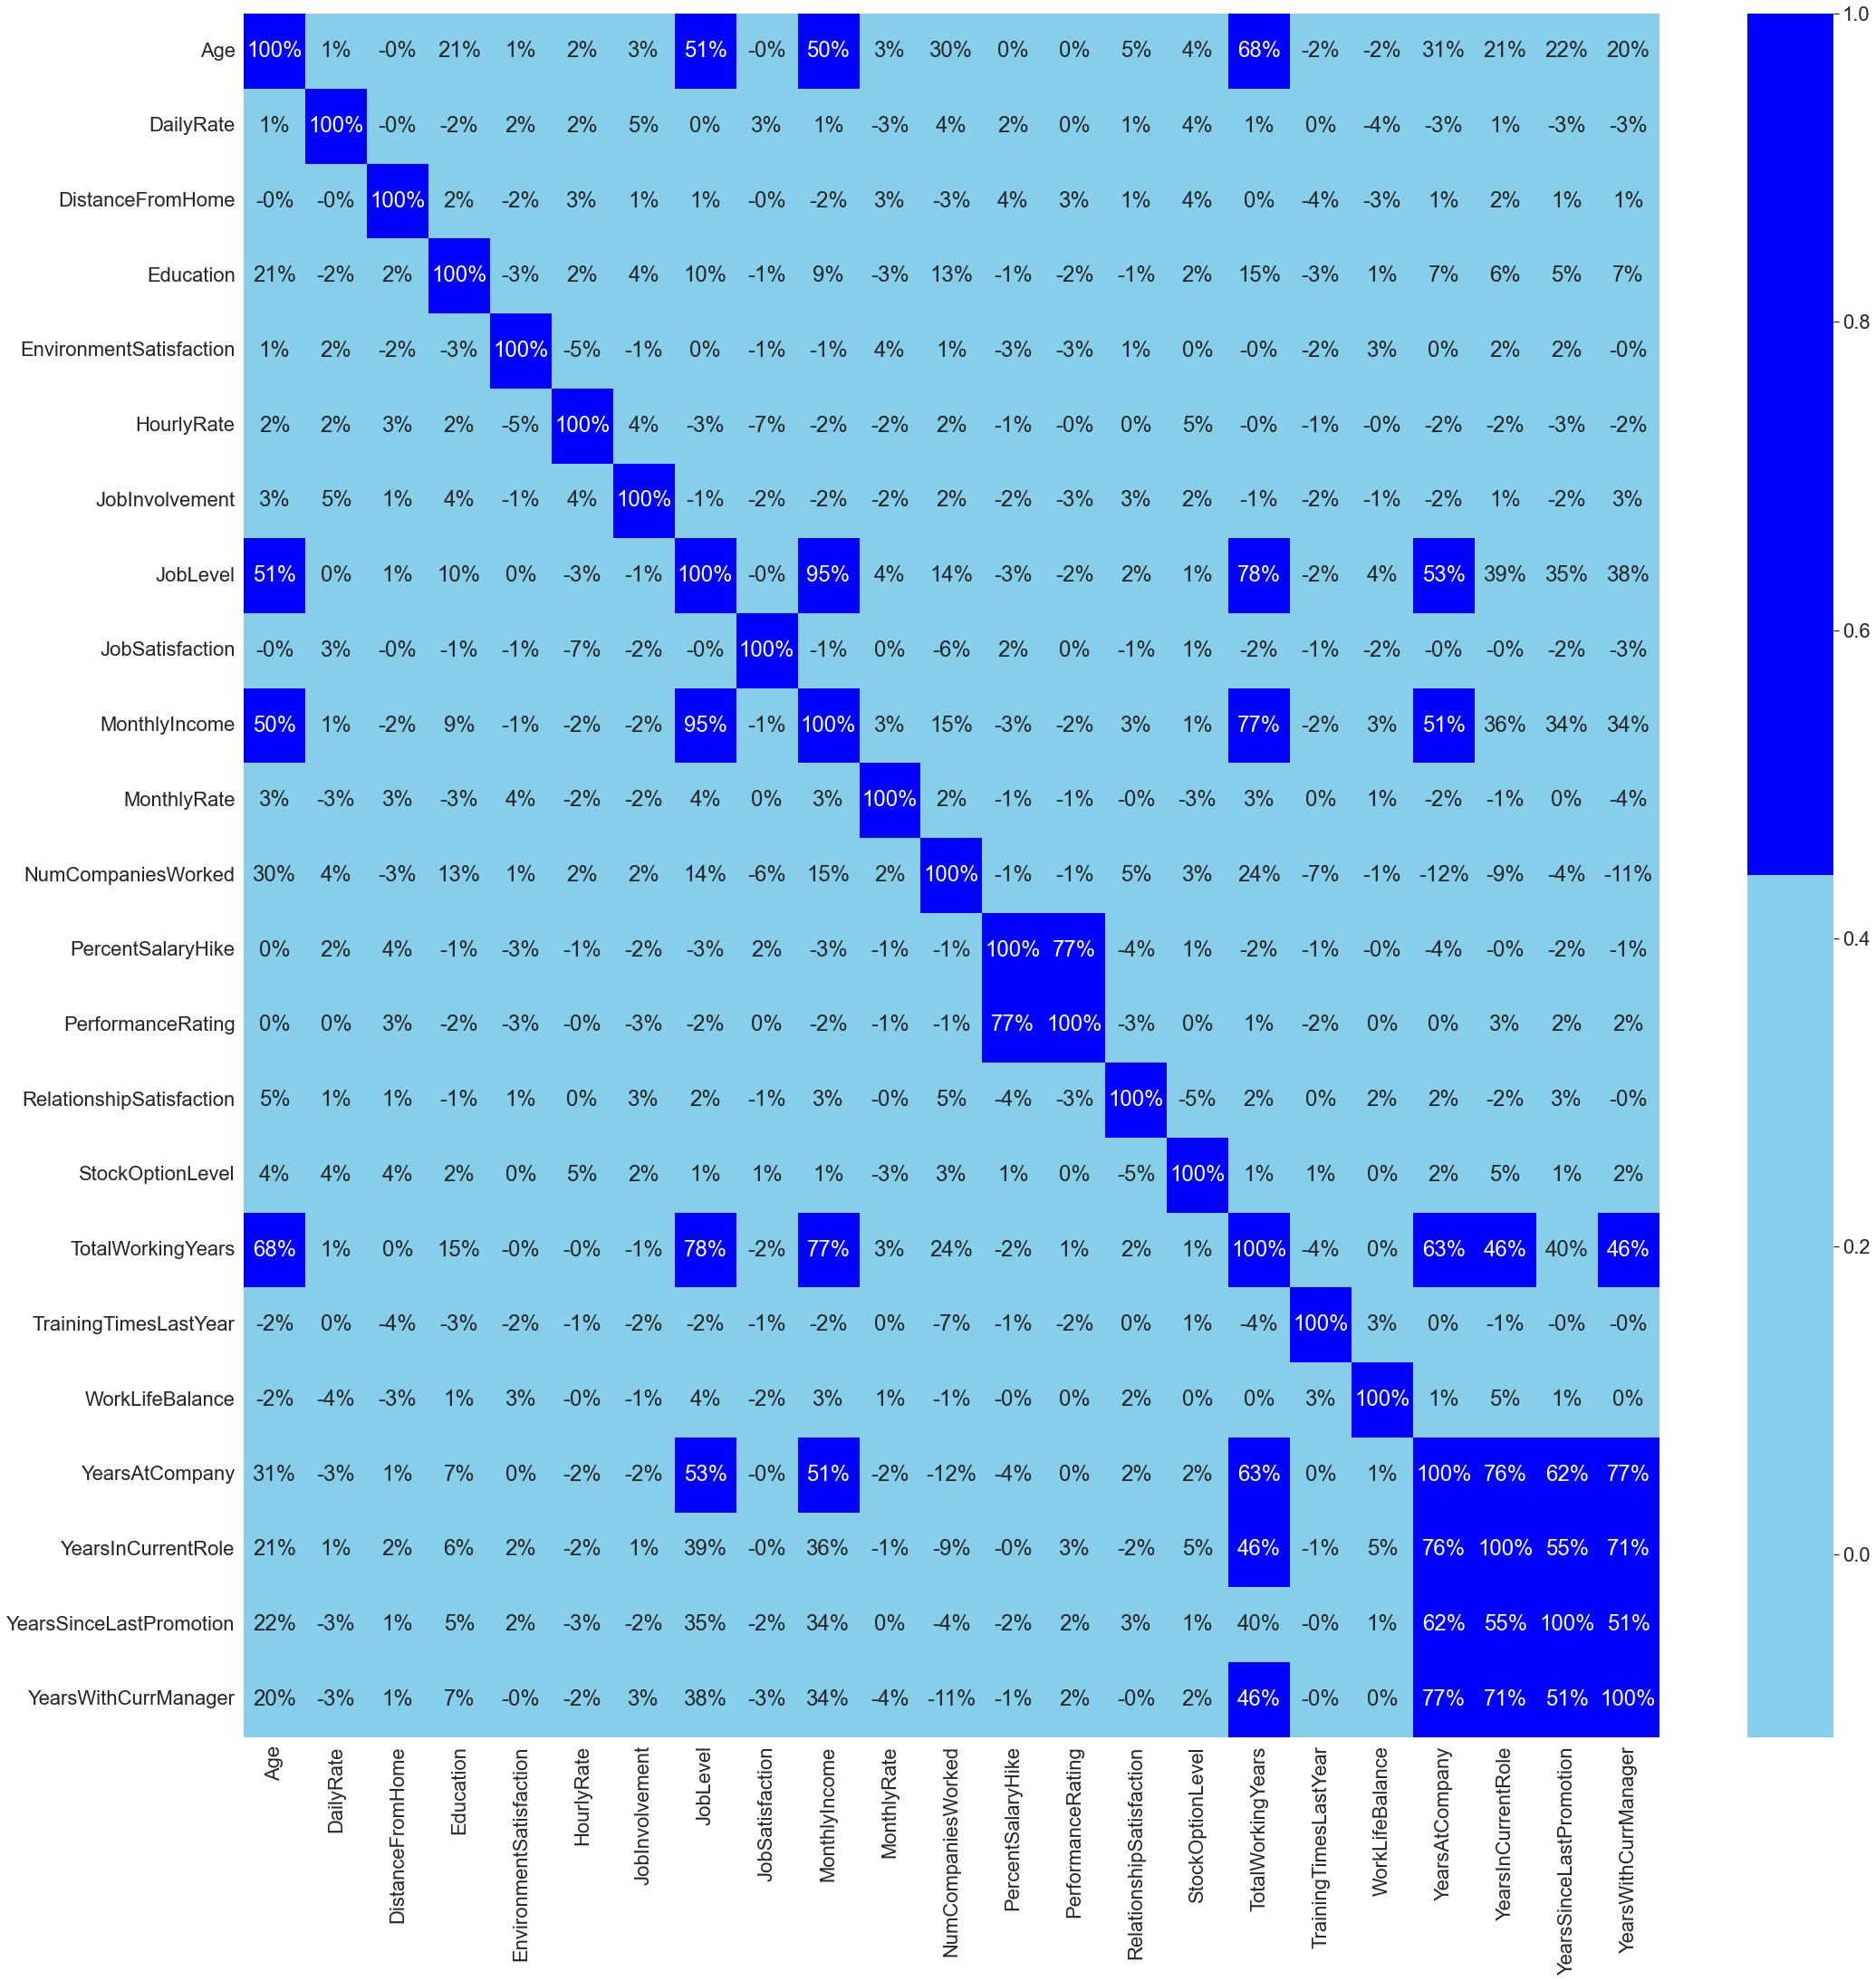

In [72]:
X = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
          'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
          'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
          'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
          'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df[['Attrition']].values.ravel()

# Create a correlation matrix
corr_matrix = X.corr()

plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, fmt='.0%', cmap=sns.color_palette(['skyblue', 'blue']))

plt.show()

Age has a 68% correlation with total working years, which means that as employees continue to work at an organization, they tend to get older, which is a logical conclusion.

Job level has a 78% correlation with total working years. We can say that as employees spend more time at a job, they are more likely to be promoted to higher job levels.

Monthly income has a 77% correlation with total working years. It indicates as employees work longer, they are likely to receive higher salaries.

Monthly income has a 95% correlation with job level, indicating that higher job levels correspond to higher pay scales/salaries.

In [73]:
out = df[['Age','DistanceFromHome','EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel','YearsInCurrentRole','YearsSinceLastPromotion','TotalWorkingYears','YearsWithCurrManager']]

<AxesSubplot:>

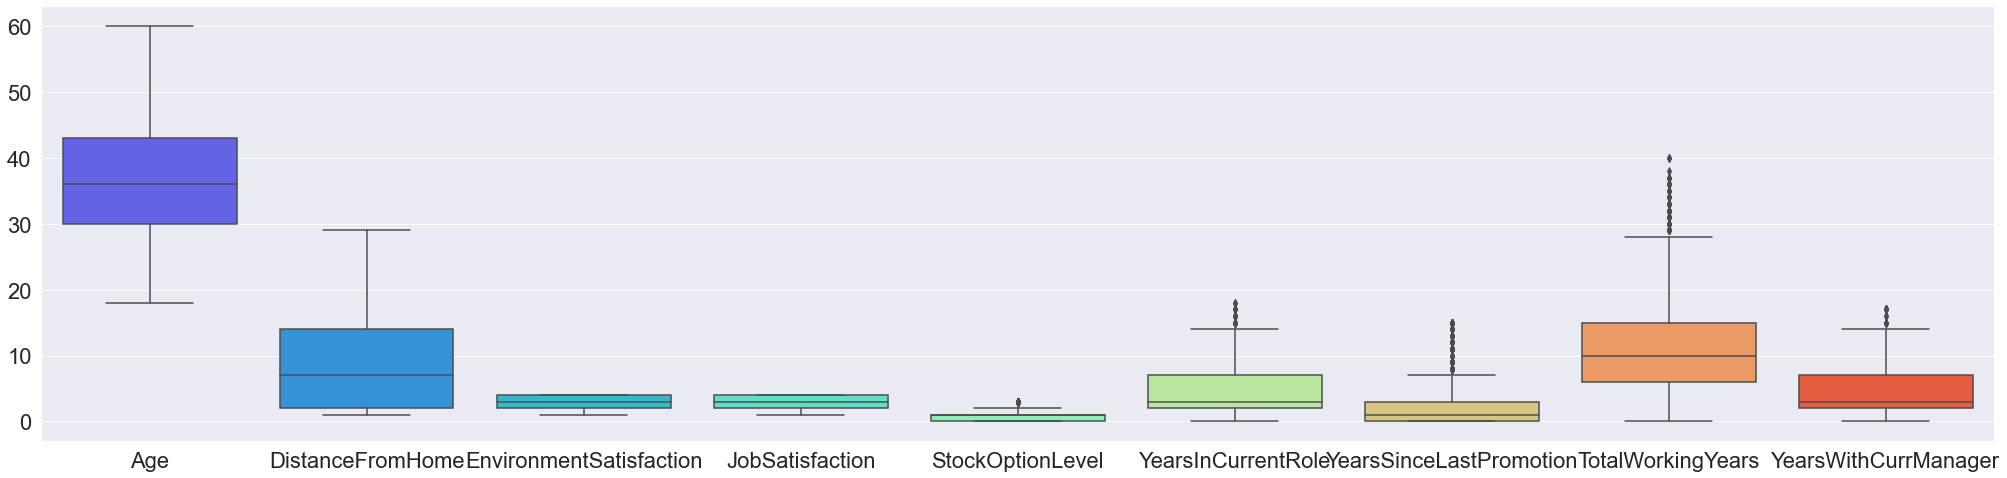

In [74]:
plt.figure(figsize=(35,8))
sns.boxplot(data=out, palette='rainbow')

<AxesSubplot:>

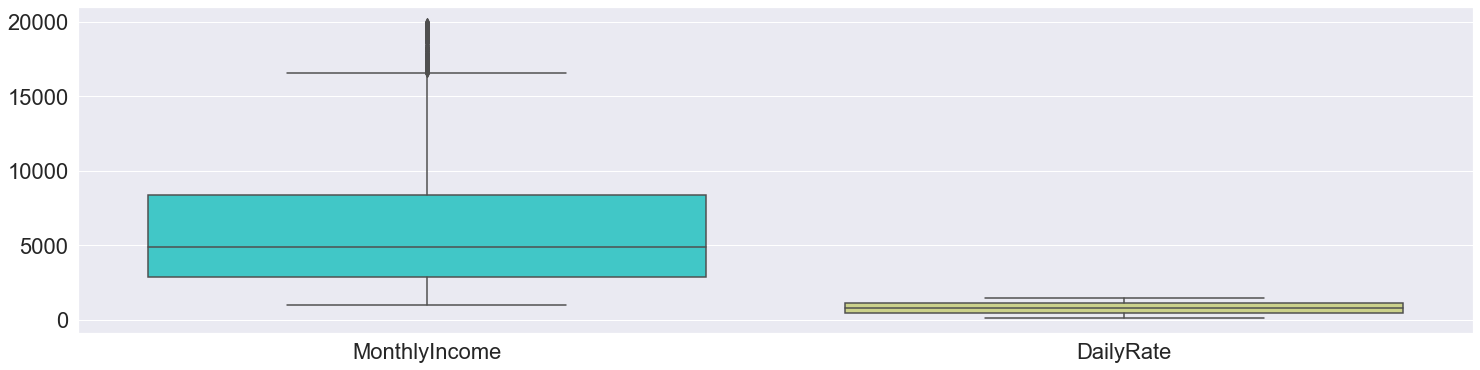

In [75]:
out1 = df[['MonthlyIncome','DailyRate']]
plt.figure(figsize=(25,6))
sns.boxplot(data=out1, palette='rainbow')

In [76]:
#Show the number of employees that left and stayed by age
color_map = {'Yes': 'lightgreen', 'No': 'skyblue'}
age_att = df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att, x='Age', y='Counts', color='Attrition', title='Agewise Counts of People in an Organization',
              color_discrete_map=color_map)

As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

In [77]:
# Group data by MonthlyIncome and Attrition and count the number of occurrences
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Round MonthlyIncome to nearest thousand
rate_att['MonthlyIncome'] = rate_att['MonthlyIncome'].round(-3)

# Group by MonthlyIncome and Attrition again and count the number of occurrences
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

fig = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition',
              title='Monthly Income Basis Counts of People in an Organization',
              color_discrete_sequence=['#8CE68C', '#87CDF6'])

fig.show()

As seen in the above chart, the attrition rate is evidently high at very low income levels - less than 5k monthly. This decreases further but a minor spike is noticed around 10k - indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

In [78]:
color_map2 = {'Yes': 'blue', 'No': 'skyblue'}
dept_att=df.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(dept_att, x='Department', y='Counts', color='Attrition', title='Department Wise Counts of People in an Organization',
             color_discrete_map=color_map2)

This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

In [79]:
# Group the data by JobSatisfaction and Attrition and count the number of occurrences
jsats_att = df.groupby(['JobSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

fig = px.area(jsats_att, x='JobSatisfaction', y='Counts', color='Attrition',
              title='Job Satisfaction Level Counts of People in an Organization', color_discrete_map=color_map)
fig.show()

With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

In [80]:
# Group the data by WorkLifeBalance and Attrition and count the number of occurrences
wlb_att = df.groupby(['WorkLifeBalance', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

fig = px.bar(wlb_att, x='WorkLifeBalance', y='Counts', color='Attrition',
             title='Work Life Balance Level Counts of People in an Organization', color_discrete_map=color_map)
fig.show()

People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

In [81]:
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [82]:
df['Age_Years'] = df['Age']
df = df.drop('Age', axis = 1)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,9


In [83]:
X = df.iloc[:,1:df.shape[1]].values
Y = df.iloc[:,0].values

In [84]:
#Split the data training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1234)

In [85]:
# Create a model (object) for classification
rfcm = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfcm.fit(X_train, Y_train)
Y_pred = rfcm.predict(X_test)

In [86]:
print('\n** Performance Scores **')
accuracy = rfcm.score(X_test, Y_test)
print('Accuracy: {0:.2f}'.format(accuracy))
print('\n** Classification Report using Random Forest Algorithm **\n')
print(metrics.classification_report(Y_test,Y_pred))


** Performance Scores **
Accuracy: 0.86

** Classification Report using Random Forest Algorithm **

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       311
           1       0.71      0.18      0.28        57

    accuracy                           0.86       368
   macro avg       0.79      0.58      0.60       368
weighted avg       0.84      0.86      0.82       368



In [87]:
# Return the feature importances (the higher, the more important the feature).
imp = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(rfcm.feature_importances_,3)}) #Note: The target column is at position 0
imp = imp.sort_values('Importance',ascending=False).set_index('feature')
imp

,importance
feature,
MonthlyIncome,0.073
Age_Years,0.064
MonthlyRate,0.060
DistanceFromHome,0.055
OverTime,0.051
HourlyRate,0.048
YearsAtCompany,0.047
TotalWorkingYears,0.047
DailyRate,0.046


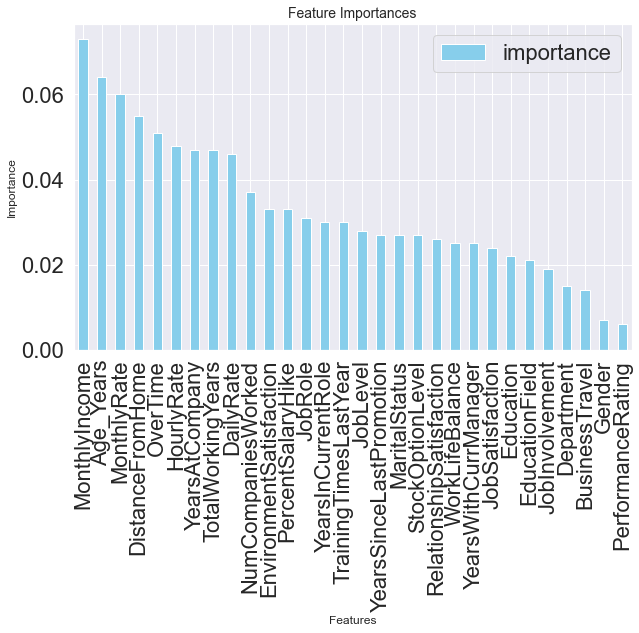

In [88]:
imp.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

Monthly income appears to be the most important feature followed by the persons age, daily rate, and monthly rate. Seeing this result makes me want to see if people with a higher income are less likely to leave than someone with a lower income.